In [17]:
import random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class KruskalMaze:
    
    """
    Generates a random maze from the given width and height using Kruskal's algorithm for minimum spanning trees
    Output:
        maze - the edges of the spanning tree
        legal_edges - a dictionary of nodes as keys and a list of legal edges to traverse as values
    """

    def __init__(self,width,height):
        self.width = width
        self.height = height
        self.nodes,self.edges = self.create_graph()
        self.maze = self.generate_maze()
        self.legal_edges = self.get_legal_traversal_edges()

    def get_random_edge_weights(self):
        """assigns random weights to each edge of the graph"""
        edge_weights = [(random.randint(1,4),x,y) for (x,y) in self.edges]
        return edge_weights

    def get_legal_traversal_edges(self):
        """gets legal edges for each node based on the spanning tree. illegal edges are walls"""
        legal_edges = {}
        for s in sorted(self.maze):
            if s[0] not in legal_edges:
                legal_edges[s[0]] = [s[1]]
            else:
                legal_edges[s[0]].append(s[1])
            if s[1] not in legal_edges:
                legal_edges[s[1]] = [s[0]]
            else:
                legal_edges[s[1]].append(s[0])
        return legal_edges

    def create_graph(self):
        """for now can't move diagonally"""
        x = self.width
        y = self.height
        nodes = set()
        edges = set()
        for i in range(x):
            for j in range(y):
                nodes.add((i,j))
                if i > 0:
                    e1 = (i-1,j)
                    edges.add(((i,j),e1))
                if i < x-1:	
                    e2 = (i+1,j)
                    edges.add(((i,j),e2))
                if j > 0:			
                    e3 = (i,j-1)
                    edges.add(((i,j),e3))
                if j < y-1:				
                    e4 = (i,j+1)
                    edges.add(((i,j),e4))
        return nodes,edges

    def generate_maze(self):
        """implements kruskal's algorithm to generate minimum spanning tree"""
        edge_weights = self.get_random_edge_weights()
        clusters = {n:n for n in self.nodes}
        ranks  = {n:0 for n in self.nodes}
        solution = set()

        def find(u):
            if clusters[u] != u:
                clusters[u] = find(clusters[u])
            return clusters[u]

        def union(x,y):
            x,y = find(x), find(y)
            if ranks[x] > ranks[y]:
                clusters[y] = x
            else:
                clusters[x] = y
            if ranks[x] == ranks[y]:
                ranks[y] += 1

        for w,x,y in sorted(edge_weights):
            if x != y:
                if find(x) != find(y):
                    #add edge to solution
                    solution.add((x,y))
                    union(x,y)
        return solution

In [3]:
km1 = KruskalMaze(4,4)

In [4]:
km1

In [5]:
km1.maze

{((0, 0), (0, 1)),
 ((0, 3), (0, 2)),
 ((1, 0), (0, 0)),
 ((1, 0), (2, 0)),
 ((1, 1), (1, 0)),
 ((1, 1), (1, 2)),
 ((1, 3), (0, 3)),
 ((1, 3), (1, 2)),
 ((2, 0), (3, 0)),
 ((2, 1), (2, 0)),
 ((2, 2), (2, 1)),
 ((2, 2), (2, 3)),
 ((3, 1), (2, 1)),
 ((3, 1), (3, 2)),
 ((3, 2), (3, 3))}

In [7]:
G = nx.Graph()

nx.add_path(G, [1, 2, 3])
nx.add_path(G, [4, 2, 5])

print('Nodes:', G.nodes)
print('Edges:', G.edges)

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (2, 4), (2, 5)]


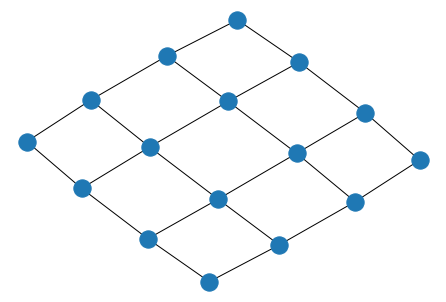

In [22]:
G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(G, iterations=100, seed=39775)


nx.draw(G)
plt.show()

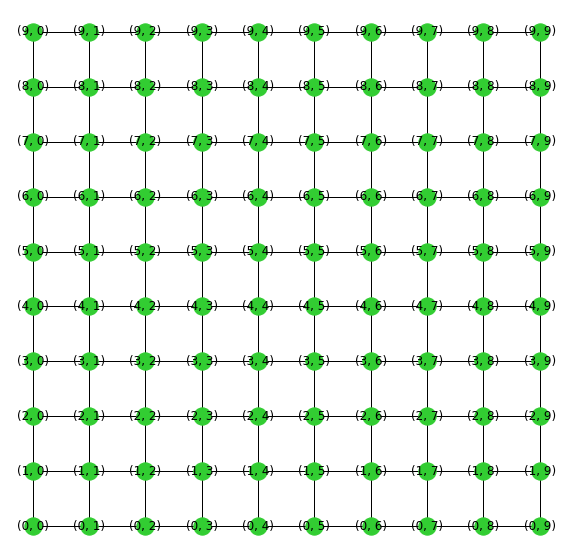

In [52]:
N = 10
plt.figure(figsize = [10,10])
G=nx.grid_2d_graph(N,N)
pos = dict( (n, n) for n in G.nodes() )
#labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
#labels = dict( ((i, j), i + (N-1-j) * 10 ) for i, j in G.nodes() )
labels = dict( ((i, j), (j, i) ) for i, j in G.nodes() )
nx.draw_networkx(G, pos=pos, labels=labels, node_color="limegreen")

plt.axis('off')
plt.show()

In [49]:
labels

{(0, 0): 90,
 (0, 1): 80,
 (0, 2): 70,
 (0, 3): 60,
 (0, 4): 50,
 (0, 5): 40,
 (0, 6): 30,
 (0, 7): 20,
 (0, 8): 10,
 (0, 9): 0,
 (1, 0): 91,
 (1, 1): 81,
 (1, 2): 71,
 (1, 3): 61,
 (1, 4): 51,
 (1, 5): 41,
 (1, 6): 31,
 (1, 7): 21,
 (1, 8): 11,
 (1, 9): 1,
 (2, 0): 92,
 (2, 1): 82,
 (2, 2): 72,
 (2, 3): 62,
 (2, 4): 52,
 (2, 5): 42,
 (2, 6): 32,
 (2, 7): 22,
 (2, 8): 12,
 (2, 9): 2,
 (3, 0): 93,
 (3, 1): 83,
 (3, 2): 73,
 (3, 3): 63,
 (3, 4): 53,
 (3, 5): 43,
 (3, 6): 33,
 (3, 7): 23,
 (3, 8): 13,
 (3, 9): 3,
 (4, 0): 94,
 (4, 1): 84,
 (4, 2): 74,
 (4, 3): 64,
 (4, 4): 54,
 (4, 5): 44,
 (4, 6): 34,
 (4, 7): 24,
 (4, 8): 14,
 (4, 9): 4,
 (5, 0): 95,
 (5, 1): 85,
 (5, 2): 75,
 (5, 3): 65,
 (5, 4): 55,
 (5, 5): 45,
 (5, 6): 35,
 (5, 7): 25,
 (5, 8): 15,
 (5, 9): 5,
 (6, 0): 96,
 (6, 1): 86,
 (6, 2): 76,
 (6, 3): 66,
 (6, 4): 56,
 (6, 5): 46,
 (6, 6): 36,
 (6, 7): 26,
 (6, 8): 16,
 (6, 9): 6,
 (7, 0): 97,
 (7, 1): 87,
 (7, 2): 77,
 (7, 3): 67,
 (7, 4): 57,
 (7, 5): 47,
 (7, 6): 37,
 (7, 7

In [48]:
G.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)))

In [47]:
G.edges

EdgeView([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 3), (1, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((0, 4), (0, 5)), ((0, 5), (1, 5)), ((0, 5), (0, 6)), ((0, 6), (1, 6)), ((0, 6), (0, 7)), ((0, 7), (1, 7)), ((0, 7), (0, 8)), ((0, 8), (1, 8)), ((0, 8), (0, 9)), ((0, 9), (1, 9)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((1, 2), (1, 3)), ((1, 3), (2, 3)), ((1, 3), (1, 4)), ((1, 4), (2, 4)), ((1, 4), (1, 5)), ((1, 5), (2, 5)), ((1, 5), (1, 6)), ((1, 6), (2, 6)), ((1, 6), (1, 7)), ((1, 7), (2, 7)), ((1, 7), (1, 8)), ((1, 8), (2, 8)), ((1, 8), (1, 9)), ((1, 9), (2, 9)), ((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((2, 3), (2, 4)), ((2, 4), (3, 4)), ((2, 4), (2, 5)), ((2, 5), (3, 5)), ((2, 5), (2, 6)), ((2, 6), (3, 6)), ((2, 6), (2, 7)), ((2, 7), (3, 7)), ((2, 7), (2, 8)), ((2, 8), (3, 8)), 